# Riiid Project: Minimally Viable Product (MVP)

## About the Project

- Build a better and more equitable answer correction prediction model for education in a post-COVID-19 world.

## Goals

- Create algorithms for "Knowledge Tracing," the modeling of student knowledge over time. 
- Accurately predict how students will perform on future interactions. 

# Imports

In [1]:
# General Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Train Validate Test
from sklearn.model_selection import train_test_split

# Modeling Imports
from sklearn.cluster import KMeans

# Acquire and Prepare Files
import acquire, prepare, explore, model

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Warnings 
import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
df_train = pd.read_csv('train.csv')
df_validate = pd.read_csv('validate.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_validate.shape, df_test.shape

((411517, 18), (50842, 18), (52868, 18))

In [3]:
# Train Data
df_train.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173


In [4]:
# Validate Data
df_validate.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,15625124241,1864702,3209,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3209.0,3207.0,3.0,4.0,157 169 162 38
1,15625124241,1864702,3208,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3208.0,3207.0,3.0,4.0,113 169 162 38


In [5]:
# Test Data
df_test.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,20170378604,1864702,8811,0,2494,1,1,3000.0,True,NaN,NaN,NaN,NaN,8811.0,8811.0,1.0,5.0,45
1,20170394313,1864702,8643,0,2495,3,1,4000.0,True,NaN,NaN,NaN,NaN,8643.0,8643.0,3.0,5.0,15


# Prepare

### Running Function that does all prep at once

In [6]:
# Produce train/validate/test
# Produce scaled train/validdate/test
train, validate, test, train_s, validate_s, test_s = prepare.prep_riiid(df_train, df_validate, df_test)

In [7]:
# Print the shape of the train
print(train.shape)

# Take a peek at the train
train.head()

(403377, 10)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,0,0.630049,0,45951.0,11917302.0,0.818182,0.682248,6.514429e+09,22241.021251
1,0,0,0.630049,0,28391.0,11917302.0,0.550000,0.534988,6.514429e+09,22241.021251
2,1,0,0.630049,0,22436.0,11917302.0,0.444444,0.445216,6.514429e+09,22241.021251
3,1,0,0.630049,0,36191.0,11917302.0,0.406250,0.544008,6.514429e+09,22241.021251
4,0,0,0.630049,0,24322.0,11917302.0,0.687500,0.485282,6.514429e+09,22241.021251


In [8]:
# Print the shape of the train
print(train_s.shape)

# Take a peek at the train
train_s.head()

(403377, 9)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,0,0.630049,0.818182,0.682248,0.119858,0.515734,0.0,0.001202
1,0,0,0.630049,0.550000,0.534988,0.119858,0.515734,0.0,0.001202
2,1,0,0.630049,0.444444,0.445216,0.119858,0.515734,0.0,0.001202
3,1,0,0.630049,0.406250,0.544008,0.119858,0.515734,0.0,0.001202
4,0,0,0.630049,0.687500,0.485282,0.119858,0.515734,0.0,0.001202


In [9]:
# Print the shape of the train
print(validate.shape)

# Take a peek at the train
validate.head()

(51971, 9)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,1,0.630049,0,11917302.0,0.468750,0.529412,6.514429e+09,22241.021251
1,1,1,0.630049,0,11917302.0,0.290323,0.578947,6.514429e+09,22241.021251
2,0,1,0.630049,0,11917302.0,0.387755,0.588235,6.514429e+09,22241.021251
3,1,1,0.630049,0,11917302.0,0.740741,0.714286,6.514429e+09,22241.021251
4,0,1,0.630049,0,11917302.0,0.428571,0.687500,6.514429e+09,22241.021251


In [10]:
# Print the shape of the train
print(validate_s.shape)

# Take a peek at the train
validate_s.head()

(51971, 9)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.468750,0.529412,0.119858,0.515734,0.0,0.001202
1,1,1,0.630049,0.290323,0.578947,0.119858,0.515734,0.0,0.001202
2,0,1,0.630049,0.387755,0.588235,0.119858,0.515734,0.0,0.001202
3,1,1,0.630049,0.740741,0.714286,0.119858,0.515734,0.0,0.001202
4,0,1,0.630049,0.428571,0.687500,0.119858,0.515734,0.0,0.001202


In [11]:
# Print the shape of the train
print(test.shape)

# Take a peek at the train
test.head()

(51971, 9)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,1,0.630049,0,11917302.0,0.468750,0.529412,6.514429e+09,22241.021251
1,1,1,0.630049,0,11917302.0,0.290323,0.578947,6.514429e+09,22241.021251
2,0,1,0.630049,0,11917302.0,0.387755,0.588235,6.514429e+09,22241.021251
3,1,1,0.630049,0,11917302.0,0.740741,0.714286,6.514429e+09,22241.021251
4,0,1,0.630049,0,11917302.0,0.428571,0.687500,6.514429e+09,22241.021251


In [12]:
# Print the shape of the train
print(test_s.shape)

# Take a peek at the train
test_s.head()

(51971, 9)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.468750,0.529412,0.119858,0.515734,0.0,0.001202
1,1,1,0.630049,0.290323,0.578947,0.119858,0.515734,0.0,0.001202
2,0,1,0.630049,0.387755,0.588235,0.119858,0.515734,0.0,0.001202
3,1,1,0.630049,0.740741,0.714286,0.119858,0.515734,0.0,0.001202
4,0,1,0.630049,0.428571,0.687500,0.119858,0.515734,0.0,0.001202


# Explore

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403377 entries, 0 to 403376
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   answered_correctly           403377 non-null  int64  
 1   question_had_explanation     403377 non-null  int64  
 2   user_acc_mean                403377 non-null  float64
 3   user_lectures_running_total  403377 non-null  int64  
 4   q_time                       403377 non-null  float64
 5   avg_user_q_time              403377 non-null  float64
 6   mean_content_accuracy        403377 non-null  float64
 7   mean_task_accuracy           403377 non-null  float64
 8   mean_timestamp_accuracy      403377 non-null  float64
 9   mean_priortime_accuracy      403377 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 43.9 MB


In [14]:
for col in train:
    if train[col].dtypes == 'int64':
        print(f'{col} has {train[col].nunique()} unique values.')

answered_correctly has 2 unique values.
question_had_explanation has 2 unique values.
user_lectures_running_total has 249 unique values.


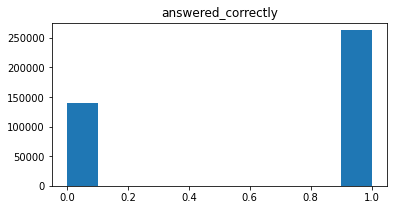

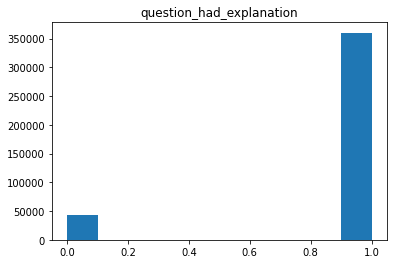

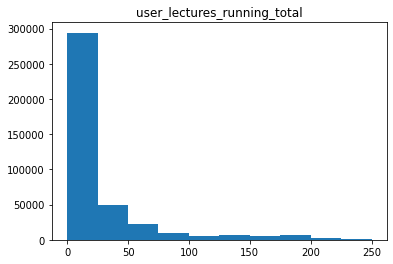

In [15]:
# Plot data to identify outliers and distributions
plt.figure(figsize=(6, 3))
                 
num_cols = train.columns[[train[col].dtype == 'int64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()  

In [16]:
for col in train:
    if train[col].dtypes == 'float64':
        print(f'{col} has {train[col].nunique()} unique values.')

user_acc_mean has 870 unique values.
q_time has 150031 unique values.
avg_user_q_time has 1999 unique values.
mean_content_accuracy has 1598 unique values.
mean_task_accuracy has 1143 unique values.
mean_timestamp_accuracy has 2000 unique values.
mean_priortime_accuracy has 1882 unique values.


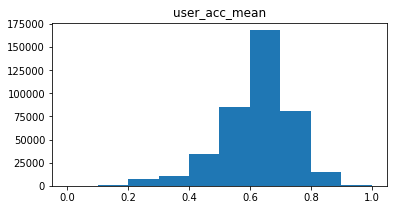

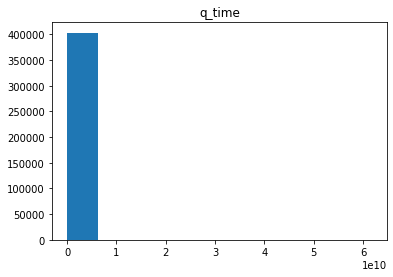

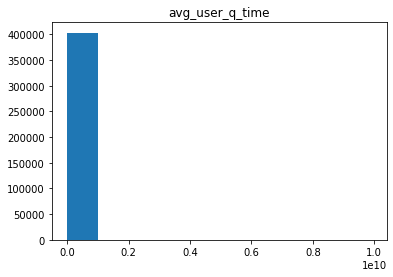

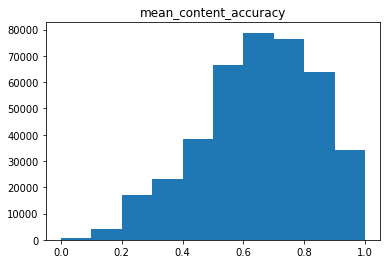

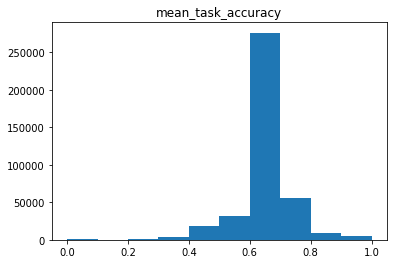

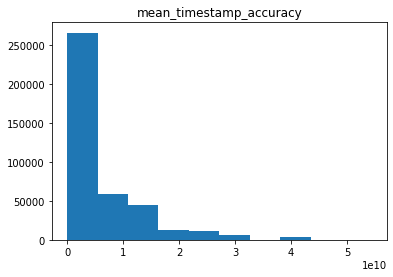

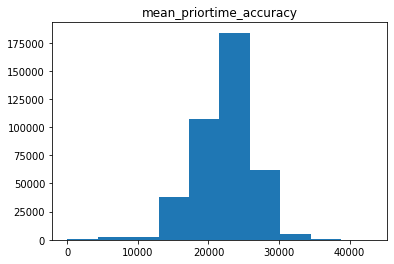

In [17]:
# Plot data to identify outliers and distributions
plt.figure(figsize=(6, 3))
                 
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()  

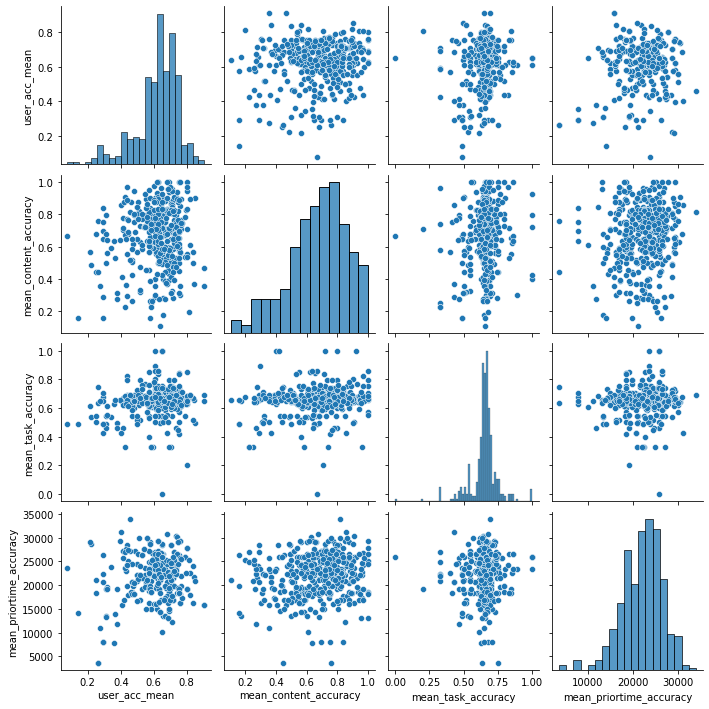

In [18]:
# Pairplot of the columns:
# user_acc_mean, mean_content_accuracy, mean_task_accuracy, mean_priortime_accuracy

cols = ["user_acc_mean", "mean_content_accuracy", "mean_task_accuracy", "mean_priortime_accuracy"]
swarm = train[cols].sample(frac=0.001, replace = False, random_state=123)
sns.pairplot(swarm)
plt.show()

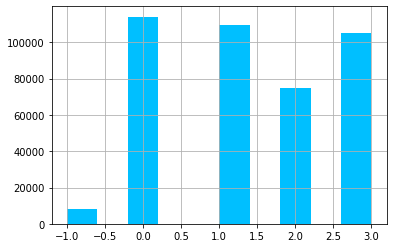

In [19]:
# User answer value count
# Use df_train for this plot
df_train['user_answer'].hist(color='deepskyblue') 
plt.show()

In [20]:
# Used df_train instead of train
df_train.user_answer.value_counts()

 0    114123
 1    109466
 3    105225
 2     74563
-1      8140
Name: user_answer, dtype: int64

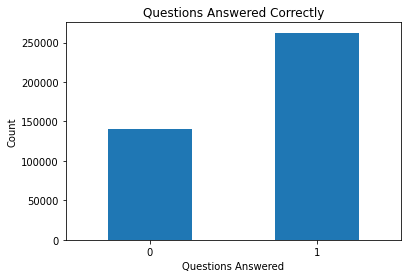

In [21]:
# Answered correctly
# This graph includes lecture counts 
train.answered_correctly.value_counts().sort_index().plot.bar()
answer_correctly = train.answered_correctly.mean()
plt.title("Questions Answered Correctly")
plt.xlabel('Questions Answered')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

NameError: name 'correct' is not defined

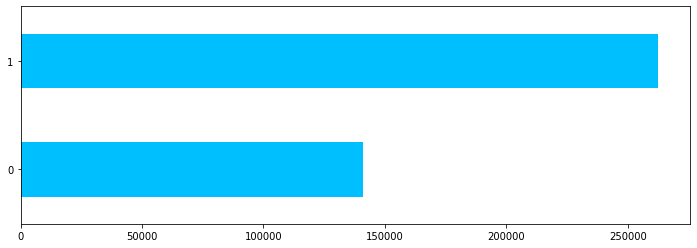

In [22]:
# Answered correctly
# Lectures removed
all_answers = df_train[df_train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)
fig = plt.figure(figsize=(12,4))
all_answers.plot.barh(color="deepskyblue")
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Questions Answered Correctly")
plt.xticks(rotation=0)
plt.show()

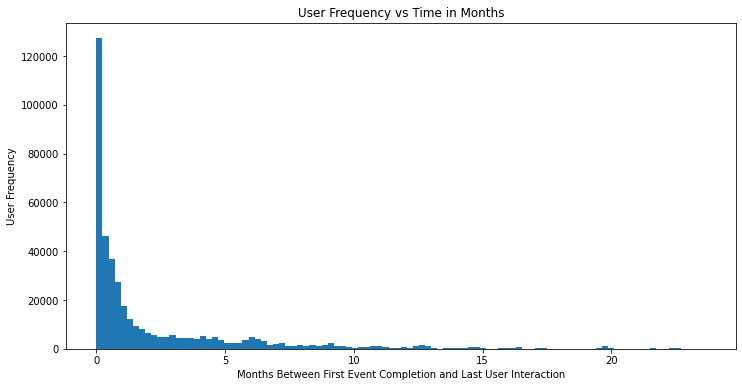

In [23]:
# User_id vs Timestamp
# Had to convert time from in milliseconds to months
ts = df_train['timestamp']/(31536000000/12)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.title("User Frequency vs Time in Months")
plt.xticks(rotation=0)
plt.xlabel("Months Between First Event Completion and Last User Interaction")
plt.ylabel("User Frequency")
plt.show()

In [24]:
user_percent = df_train[df_train.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'The most number of questions answered by a user is {user_percent.Answers.max()}')

The most number of questions answered by a user is 10878


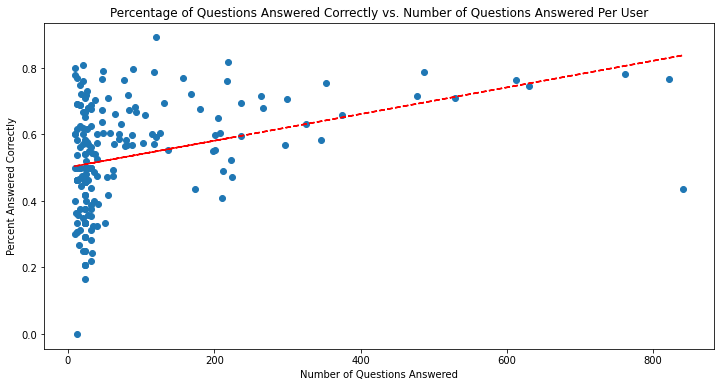

In [25]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Percentage of Questions Answered Correctly vs. Number of Questions Answered Per User")
plt.xlabel("Number of Questions Answered")
plt.ylabel("Percent Answered Correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [26]:
content_percent = df_train[df_train.answered_correctly != -1].groupby('content_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'The highest number of questions asked by content_id is {content_percent.Answers.max()}.')
print(f'Of {len(content_percent)} content_ids, {len(content_percent[content_percent.Answers > 25000])} content_ids had more than 25,000 questions asked.')

The highest number of questions asked by content_id is 1028.
Of 12520 content_ids, 0 content_ids had more than 25,000 questions asked.


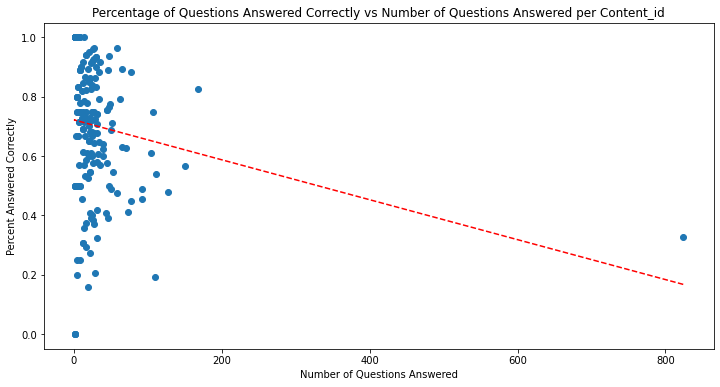

In [27]:
content_percent = content_percent.query('Answers <= 25000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = content_percent.Answers
y = content_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Percentage of Questions Answered Correctly vs Number of Questions Answered per Content_id")
plt.xticks(rotation=0)
plt.xlabel("Number of Questions Answered")
plt.ylabel("Percent Answered Correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

prior_question_had_explanation
False     41191
True     360193
Name: (answered_correctly, count), dtype: int64


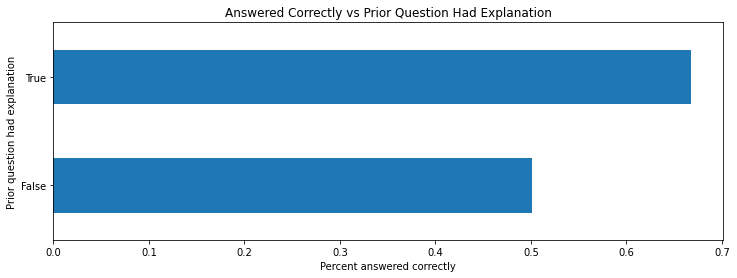

In [28]:
pq = df_train[df_train.answered_correctly != -1].groupby(['prior_question_had_explanation']).agg({'answered_correctly': ['mean', 'count']})
#pq.index = pq.index.astype(str)
print(pq.iloc[:,1])
pq = pq.iloc[:,0]

fig = plt.figure(figsize=(12,4))
pq.plot.barh()
# for i, v in zip(pq.index, pq.values):
#     plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Answered Correctly vs Prior Question Had Explanation")
plt.xlabel("Percent answered correctly")
plt.ylabel("Prior question had explanation")
plt.xticks(rotation=0)
plt.show()

False    1305
True      695
Name: Watches_lecture, dtype: int64


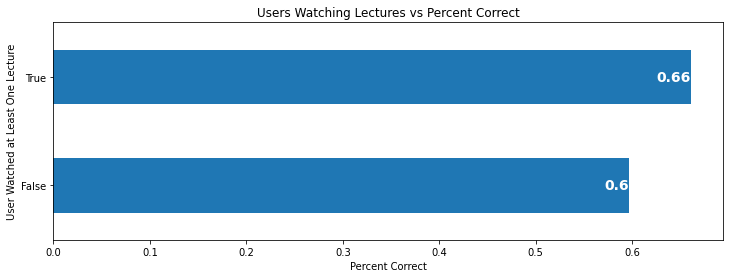

In [29]:
user_lect = df_train.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("Users Watching Lectures vs Percent Correct")
plt.xlabel("Percent Correct")
plt.ylabel("User Watched at Least One Lecture")
plt.xticks(rotation=0)
plt.show()

In [30]:
## Crosstab (Discrete x Discrete)
pd.crosstab(df_train.user_answer, df_train.answered_correctly, margins=True)

answered_correctly,-1,0,1,All
user_answer,,,,
-1,8140,0,0,8140
0,0,39607,74516,114123
1,0,39296,70170,109466
2,0,25069,49494,74563
3,0,36834,68391,105225
All,8140,140806,262571,411517


In [31]:
df_train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89


In [32]:
# There 3600000 ms in an hour
df_train['ts_in_hours'] = df_train['timestamp']/(3600000)

# There 86400000 ms in an hour
df_train['ts_in_days'] = df_train['timestamp']/(86400000)

df_train 

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags,ts_in_hours,ts_in_days
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115,0.000000,0.000000
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173,0.012764,0.000532
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1,0.020651,0.000860
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55,0.026883,0.001120
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89,0.036936,0.001539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411512,568427,2145492661,172,0,26,1,1,21000.0,False,NaN,NaN,NaN,NaN,172.0,172.0,1.0,1.0,10 164 81,0.157896,0.006579
411513,593283,2145492661,7898,0,27,3,0,18000.0,False,NaN,NaN,NaN,NaN,7898.0,7898.0,2.0,1.0,131 99 29,0.164801,0.006867
411514,614284,2145492661,175,0,28,0,0,22000.0,False,NaN,NaN,NaN,NaN,175.0,175.0,2.0,1.0,9 10 92,0.170634,0.007110
411515,632206,2145492661,100,0,29,2,0,18000.0,False,100.0,70.0,1.0,concept,100.0,100.0,0.0,1.0,131 5 81,0.175613,0.007317


In [33]:
df_train.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,lecture_id,tag,lecture_part,question_id,bundle_id,correct_answer,question_part,ts_in_hours,ts_in_days
count,4.115170e+05,4.115170e+05,411517.000000,411517.000000,411517.000000,411517.000000,411517.000000,401384.0,13501.000000,13501.000000,13501.000000,406579.000000,406579.000000,406579.000000,406579.000000,411517.000000,411517.000000
mean,5.868159e+09,1.083021e+09,5142.540636,0.019780,775.541343,1.375707,0.618276,inf,12270.451300,7.888897,4.194504,4923.058065,4922.630239,1.439415,4.084724,1630.044174,67.918507
std,9.156527e+09,6.700516e+08,3810.084394,0.139245,1240.923367,1.191337,0.524950,NaN,9500.166623,80.663944,1.839912,3204.849006,3204.749562,1.151768,1.671508,2543.479759,105.978323
min,0.000000e+00,1.864702e+06,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.0,89.000000,-128.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.612504e+08,4.844761e+08,2065.000000,0.000000,83.000000,0.000000,0.000000,16000.0,4187.000000,-85.000000,2.000000,2064.000000,2063.000000,0.000000,2.000000,100.347332,4.181139
50%,1.776387e+09,1.059277e+09,4982.000000,0.000000,300.000000,1.000000,1.000000,21000.0,9896.000000,33.000000,5.000000,4851.000000,4851.000000,1.000000,5.000000,493.440732,20.560031
75%,7.594605e+09,1.685634e+09,7216.000000,0.000000,896.000000,3.000000,1.000000,30000.0,19223.000000,71.000000,5.000000,6980.000000,6976.000000,3.000000,5.000000,2109.612507,87.900521
max,6.212613e+10,2.145493e+09,32736.000000,1.000000,9176.000000,3.000000,1.000000,inf,32736.000000,127.000000,7.000000,13522.000000,13522.000000,3.000000,7.000000,17257.259648,719.052485


In [34]:
df_train['quantiles'] = pd.qcut(df_train['ts_in_days'],
                            q=[0,.25,.5,.75,1],
                            labels=False,
                            precision=0)
df_train.quantiles.value_counts()

0    102880
3    102879
2    102879
1    102879
Name: quantiles, dtype: int64

In [35]:
swarm_df = df_train.sample(frac=.001, replace=False, random_state=123)

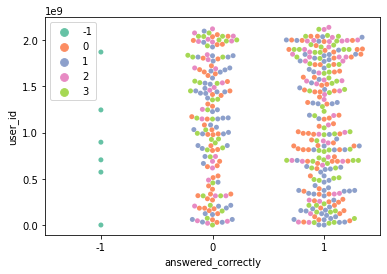

In [36]:
sns.swarmplot(x="answered_correctly", y="user_id", data=swarm_df, hue="user_answer", palette="Set2")
plt.legend()

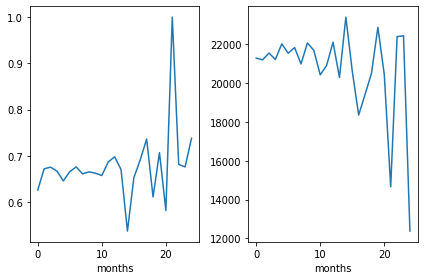

In [13]:
df = df_train[df_train.answered_correctly != -1]
df = prepare.handle_inf(df)
accuracy_on_time = explore.feature_over_time("answered_correctly", df, "mean")
last_q_on_time = explore.feature_over_time("prior_question_elapsed_time", df, "mean")

plt.subplot(121)
accuracy_on_time.groupby("months").answered_correctly.mean().plot()

plt.subplot(122)
last_q_on_time.groupby("months").prior_question_elapsed_time.mean().plot()

plt.tight_layout()
plt.show()

In [ ]:
# Rates feature importance 
import lightgbm as lgb
model = lgb.df(
                    {'objective': 'binary'}, 
                    lgb_train,
                    valid_sets=[lgb_train, lgb_valid],
                    verbose_eval=100,
                    num_boost_round=10000,
                    early_stopping_rounds=10
                )
print('auc:', roc_auc_score(y_va, model.predict(valid[FEATS])))
_ = lgb.plot_importance(model)

# Feature Engineering

## Seperate the features and target

In [14]:
X_train = train_s.drop(columns='answered_correctly')
y_train = train_s['answered_correctly']

X_validate = validate_s.drop(columns='answered_correctly')
y_validate = validate_s['answered_correctly']

X_test = test_s.drop(columns='answered_correctly')
y_test = test_s['answered_correctly']

In [15]:
# Take a peek at the X_train
X_train.head(3)

,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,0,0.630049,0.818182,0.682248,0.119858,0.515734,0.0,0.001202
1,0,0.630049,0.550000,0.534988,0.119858,0.515734,0.0,0.001202
2,0,0.630049,0.444444,0.445216,0.119858,0.515734,0.0,0.001202


In [16]:
# Take a peak at the y_train
y_train.head(3)

0    1
1    0
2    1
Name: answered_correctly, dtype: int64

## Select top 5 features by Select K Best

In [17]:
# Compute the top 5 features by 
f_features = explore.KBest_ranker(X_train, y_train, 5)

# Print the top 5 features
f_features

['question_had_explanation',
 'user_acc_mean',
 'mean_content_accuracy',
 'mean_task_accuracy',
 'mean_timestamp_accuracy_scaled']

RFE ranker top 5 
- mean_content_accuracy
- user_acc_mean
- mean_task_accuracy
- avg_user_q_time_scaled
- prior_question_had_explanation

**Takeaways**
1. The top 5 features genreated by select  are 

# Modeling

## Compute the auc score of the baseline

### Use the randomly generated classes as the baseline

In [18]:
# Compute the size of y_train
size = y_train.size

# Construct y_baseline
y_baseline_random = np.random.randint(2, size=size)

# Print the y_baseline
y_baseline_random

array([0, 1, 0, ..., 0, 1, 0])

In [19]:
# Compute the auc score 
roc_auc_score(y_train, y_baseline_random)

0.5013084725259798

### Use the most frequent calss as the baseline

In [20]:
# Compute the most frequent class
y_train.value_counts(normalize=True)

1    0.650932
0    0.349068
Name: answered_correctly, dtype: float64

In [21]:
# Construct the y_baseline_frequency
y_baseline_frequency = np.array([1]*size)

# Check the baseline values
y_baseline_frequency

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
# Compute the auc score 
roc_auc_score(y_train, y_baseline_frequency)

0.5

**Takeaways**
1. Two methods are used to generate the baseline values.
2. The baseline is 0.5 regardless of the chosen methods.

## Model the train/validate/test using various classification algorithms

In [23]:
# Create a list of names of the classifiers
# Make sure all the classifiers have the method: predict_proba

names = ['LogisticRegression',
         'Decision Tree',
         'Random Forest',
         'Ada Boost',
         'Gradient Boost',
         'Nearest Neighbors',
         'Naive Bayes',
         'Neural Net'
        ]

In [24]:
# Create a list of classifiers

classifiers = [LogisticRegression(), 
               DecisionTreeClassifier(max_depth=3),
               RandomForestClassifier(max_depth=3),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier(3),
               GaussianNB(), 
               MLPClassifier()
              ]

In [25]:
# Sanity check: the size between the two should be the same
len(names) == len(classifiers)

True

In [26]:
# Use the classifiers created above to model the train, validate and test

metrics = model.model_multiple_algos(names, classifiers, 
                                     X_train, y_train, 
                                     X_validate, y_validate, 
                                     X_test, y_test)

Currently runnig on model LogisticRegression
LogisticRegression has completed
Currently runnig on model Decision Tree
Decision Tree has completed
Currently runnig on model Random Forest
Random Forest has completed
Currently runnig on model Ada Boost
Ada Boost has completed
Currently runnig on model Gradient Boost
Gradient Boost has completed
Currently runnig on model Nearest Neighbors
Nearest Neighbors has completed
Currently runnig on model Naive Bayes
Naive Bayes has completed
Currently runnig on model Neural Net
Neural Net has completed


In [28]:
# Rank the auc scores on test dataset in the descending order

mask = (metrics.dataset == 'test')
metrics[mask].sort_values(by="AUC score", ascending=False)

,AUC score,Algo,dataset
2,0.690355,LogisticRegression,test
8,0.689555,Random Forest,test
14,0.688019,Gradient Boost,test
23,0.686952,Neural Net,test
11,0.676692,Ada Boost,test
20,0.676435,Naive Bayes,test
5,0.675218,Decision Tree,test
17,0.626399,Nearest Neighbors,test


**Takeaways**
- The highest auc score on the test dataset is produced by Logistic Regression.
- The auc score from the top model is 0.69, which beats the baseline by 19%. 

### Plot the ROC curve on the top model

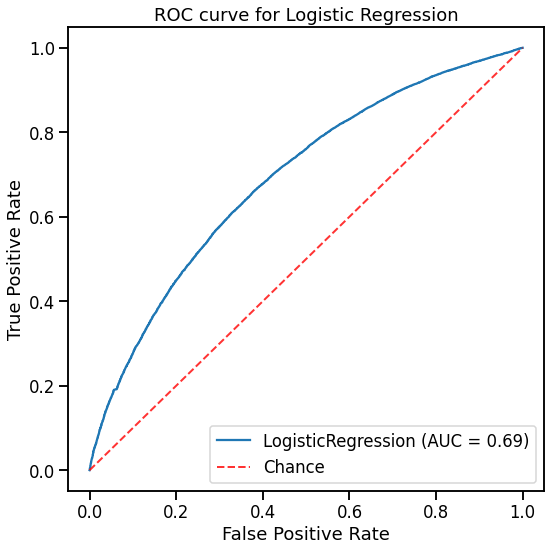

In [30]:
# Create the lr object and fit on train

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

# Plot the ROC curve on test
model.auc_curve_plot1(lr, "Logistic Regression", X_test, y_test)

# Conclusions

### Future Investigations

### Resources

- https://www.kaggle.com/c/riiid-test-answer-prediction/overview/description
- https://www.kaggle.com/isaienkov/riiid-answer-correctness-prediction-eda-modeling

### Contact Us

Dani Bojado
- daniella.bojado@gmail.com 

Samuel Davila
- samuelrdavila@gmail.com

Yongliang Shi
- yongliang.michael.shi@gmail.com

Christopher Logan Ortiz
- christopher.logan.ortiz@gmail.com